<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/ECE_565_Lecture_3_Physical_and_Empirical_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical and Empirical Distributions




This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 03.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
from scipy.stats import binom,chi2,lognorm,poisson,t,weibull_min
import matplotlib.pyplot as plt 
import numpy as np

This notebook will look at some common statistical distributions, namely the distributions mentioned in class.

To start we will look at two discrete distrubutions

# Binomial Distribution

In [ ]:
n, p = 10, 0.4

# This discrete random variable is parametrized by two variables
# n and p

# we can calculate the statistics of this distribution 
# parametrized by n and p

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 4.0 
Variance: 2.4 
Skew:  0.12909944487358052 
Kurt:  -0.1833333333333334


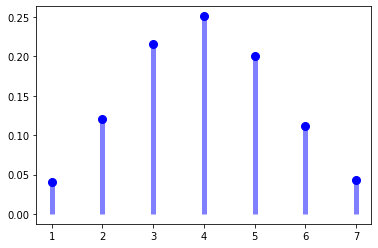

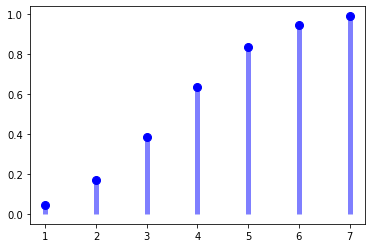


Test CDF
 [1. 2. 3. 4. 5. 6. 7.] 
 [0.0463574  0.16728975 0.3822806  0.63310326 0.83376138 0.94523812
 0.98770545]

Generate Random samples from distribution
 [3 6 4 6 2 6 5 2 2 5 5 2 3 4 4 6 4 2 4 4 6 3 3 3 5 3 3 5 5 5 4 3 5 4 3 3 7
 4 3 5 4 3 6 8 6 3 6 3 5 6 4 5 2 4 3 2 5 3 5 1 5 4 6 3 3 2 6 1 5 5 6 4 4 4
 7 4 3 2 9 2 3 4 5 4 4 4 4 3 7 4 2 8 3 5 3 6 6 4 3 3]


In [ ]:
fig, ax = plt.subplots(1, 1)

## we can also plot the distribution
## ppf will return x calues for a given precentile of the CDF
## the statement below returns x values 
## ranging from the 1st precentile to the 99th precentile
## essentially, it returns the x range of our CDF

x = np.arange(binom.ppf(0.01, n, p),
             binom.ppf(0.99, n, p))


## we can then use these x values to plot 
## the cdf and pdf of our distribution

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)


fig, ax = plt.subplots(1, 1)

ax.plot(x, binom.cdf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5)


plt.show()

## x values can be plugged into the cdf
## additionally we can create random variables 
## from our defined distribution 


prob = binom.cdf(x, n, p)

print('\nTest CDF\n',x,'\n',prob)

r = binom.rvs(n, p, size=100)

print('\nGenerate Random samples from distribution\n', r)



# Poission Distribution

In [ ]:
mu = 2
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 2.0 
Variance: 2.0 
Skew:  0.7071067811865476 
Kurt:  0.5


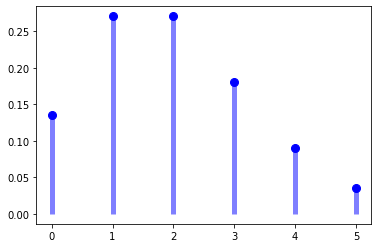


Test CDF
 [0. 1. 2. 3. 4. 5.] 
 [0.13533528 0.40600585 0.67667642 0.85712346 0.94734698 0.98343639]

Generate Random samples from distribution
 [0 2 2 4 1 1 2 1 0 6]


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))

ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)

plt.show()

prob = poisson.cdf(x, mu)

print('\nTest CDF\n',x,'\n',prob)

r = poisson.rvs(mu, size=10)

print('\nGenerate Random samples from distribution\n', r)

# Below are some common continuous distributions 

# Chi-Squared

In [ ]:
df = 55
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 55.0 
Variance: 110.0 
Skew:  0.3813850356982369 
Kurt:  0.21818181818181817


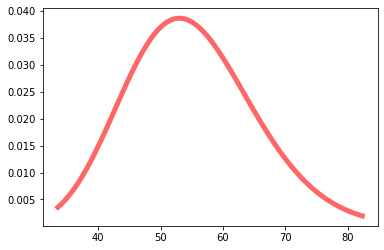


Test CDF
 [33.57047525 45.87392009 58.17736494 70.48080978] 
 [0.01       0.19517146 0.6408099  0.92203091]

Generate Random samples from distribution
 [70.03227484 50.10537856 62.34471383 34.99719184 51.35975616]


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(chi2.ppf(0.01, df),
               chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df),
        'r-', lw=5, alpha=0.6, label='chi2 pdf')

plt.show()

prob = chi2.cdf(x[0:100:25], df)

print('\nTest CDF\n',x[0:100:25],'\n',prob)

r = chi2.rvs(df, size=5)

print('\nGenerate Random samples from distribution\n', r)


# Student T

In [ ]:
df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 0.0 
Variance: 3.7027027027027017 
Skew:  nan 
Kurt:  inf


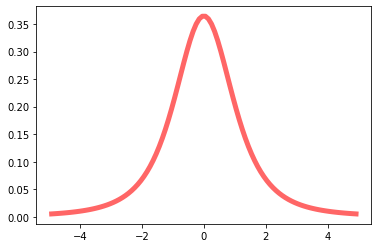


Test CDF
 [-4.90386105 -2.42716355  0.04953395  2.52623145] 
 [0.01       0.05084845 0.51806008 0.95316781]

Generate Random samples from distribution
 [ 0.89318694 -0.18841936  0.25488724 -0.96070262 -1.68260161]


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(t.ppf(0.01, df),
                 t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
        'r-', lw=5, alpha=0.6, label='t pdf')

plt.show()

prob = t.cdf(x[0:100:25], df)

print('\nTest CDF\n',x[0:100:25],'\n',prob)

r = t.rvs(df, size=5)

print('\nGenerate Random samples from distribution\n', r)


# Log Normal

In [ ]:
s = 0.954
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 1.576264803741382 
Variance: 3.6886797556399684 
Skew:  5.464256148333118 
Kurt:  81.30583448651502


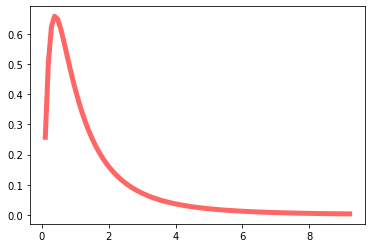


Test CDF
 [0.10868126 2.40477641 4.70087156 6.99696671] 
 [0.01       0.82115252 0.94763871 0.97928914]

Generate Random samples from distribution
 [1.16099119e+00 8.85545605e-01 6.95620527e-01 8.51933424e-05
 3.45966461e+01]


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(lognorm.ppf(0.01, s),
                 lognorm.ppf(0.99, s), 100)

ax.plot(x, lognorm.pdf(x, s),
        'r-', lw=5, alpha=0.6, label='lognorm pdf')

plt.show()

prob = lognorm.cdf(x[0:100:25], s)

print('\nTest CDF\n',x[0:100:25],'\n',prob)

r = lognorm.rvs(df, size=5)

print('\nGenerate Random samples from distribution\n', r)


# Weibull Minimum 

In [ ]:
c = 1.79
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

print("Mean:", mean,
      "\nVariance:",var,
      "\nSkew: ",skew,
      "\nKurt: ",kurt)

Mean: 0.8895312083339716 
Variance: 0.26414885038021363 
Skew:  0.7869416254814524 
Kurt:  0.5763152896528974


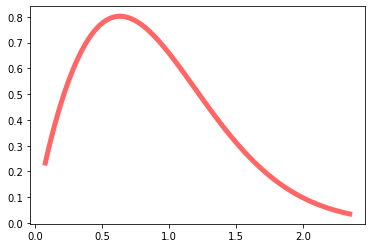


Test CDF
 [0.07654199 0.64991075 1.22327951 1.79664827] 
 [0.01       0.37022314 0.7617423  0.94239981]

Generate Random samples from distribution
 [0.99547694 0.59311788 1.16408785 1.24541287 0.47259421]


In [ ]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(weibull_min.ppf(0.01, c),
                 weibull_min.ppf(0.99, c), 100)

ax.plot(x, weibull_min.pdf(x, c),
        'r-', lw=5, alpha=0.6, label='weibull_min pdf')

plt.show()

prob = weibull_min.cdf(x[0:100:25], c)

print('\nTest CDF\n',x[0:100:25],'\n',prob)

r = weibull_min.rvs(df, size=5)

print('\nGenerate Random samples from distribution\n', r)

In [ ]:
## below is a function to create numerical hazard rates and survival rates
## a time array, pdf and cdf should be passed into the function
## the cdf and pdf should come in the form of probabilty values
## corresponding to the time array parsed into the function

def hazard_rate(time,f,F):

  H = [0]

  ## hazard rate and survival rate can be calculated
  ## using the expressions from lecture 3 pg 11

  R = 1 - F

  lmd = f/R

  ## a numerical integral can be used to calculate the
  ## cumulative hazard rate

  dt = (time[len(time) - 1]-time[0])/(len(time))
  p = 100

  for i in range(len(lmd)):

      temp = H[i] + lmd[i]*dt

      H.append(temp) 

  del H[0]
  avgH = H/time

  ## then the funcitons can be plotted

  plt.figure(1)
  plt.plot(time,R)
  plt.title("Numerical Surviaval Rate")
  plt.xlabel("Time")
  plt.ylabel("Probability")

  plt.figure(2)
  plt.plot(time,lmd)
  plt.title("Numerical Hazard Rate")
  plt.xlabel("Time")
  plt.ylabel("Probability") 
  
  ## Can also plot cumulative Hazard Rate 
  ## and average hazard
  '''
  plt.figure(3)
  plt.plot(time,H)
  plt.title("Cumulative Hazard Rate")

  plt.figure(4)
  plt.plot(time,avgH)
  plt.title("Average Hazard")
  '''

  plt.show()

  ## additionally, the values for the hazard and survival rate
  ## are returned to be used as however desired
  
  return R, lmd, H , avgH


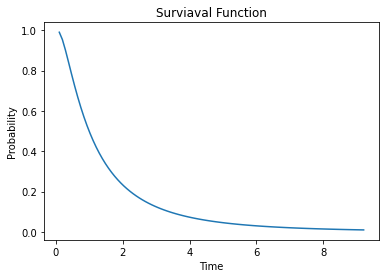

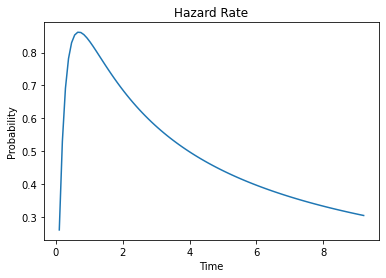

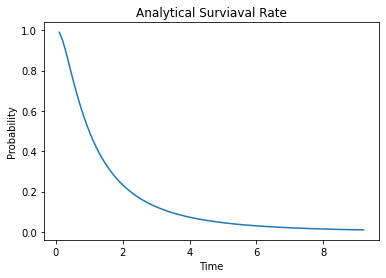

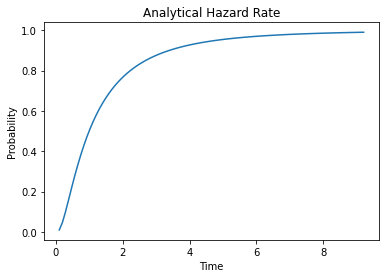

In [ ]:
x = np.linspace(lognorm.ppf(0.01, s),
                 lognorm.ppf(0.99, s), 100)

## our numerical hazard and survival rate function can be used
## to calculate the hazard and survival rate
R, lmd, H, avgH = hazard_rate(x,lognorm.pdf(x, s),lognorm.cdf(x, s))

plt.figure()

## Or we can take use of scipy's built in survival functions
## Most distributions in scipy also have a survial function method

plt.plot(x, lognorm.sf(x, s, loc=0, scale=1))
plt.title("Analytical Surviaval Rate")
plt.xlabel("Time")
plt.ylabel("Probability")

plt.figure()

plt.plot(x, 1-lognorm.sf(x, s, loc=0, scale=1))
plt.title("Analytical Hazard Rate")
plt.xlabel("Time")
plt.ylabel("Probability")


plt.show()



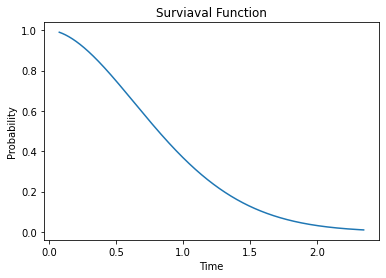

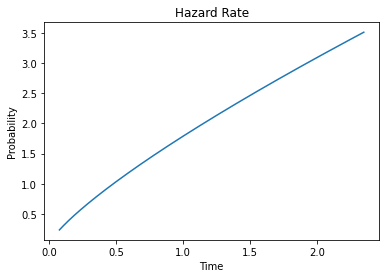

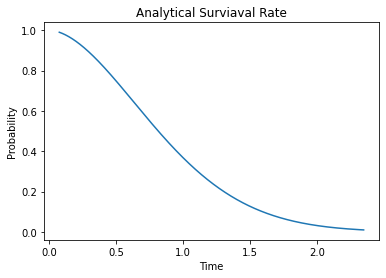

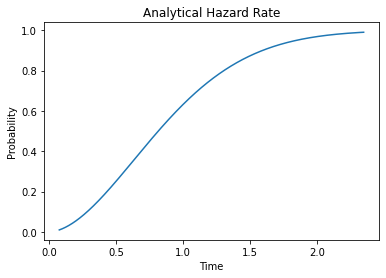

In [ ]:
x = np.linspace(weibull_min.ppf(0.01, c),
                 weibull_min.ppf(0.99, c), 100)

R, lmd, H, avgH = hazard_rate(x,weibull_min.pdf(x, c),weibull_min.cdf(x, c))

plt.figure()

## Or we can take use of scipy's built in survival functions
## Most distributions in scipy also have a survial function method

plt.plot(x, weibull_min.sf(x, c, loc=0, scale=1))
plt.title("Analytical Surviaval Rate")
plt.xlabel("Time")
plt.ylabel("Probability")

plt.figure()

plt.plot(x, 1-weibull_min.sf(x, c, loc=0, scale=1))
plt.title("Analytical Hazard Rate")
plt.xlabel("Time")
plt.ylabel("Probability")

## sometimes the analytical result is better

plt.show()


# References
[Scipy Stats Module ](https://docs.scipy.org/doc/scipy/reference/stats.html)

[Matplotlib](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.html)

[Numpy](https://numpy.org/doc/stable/)